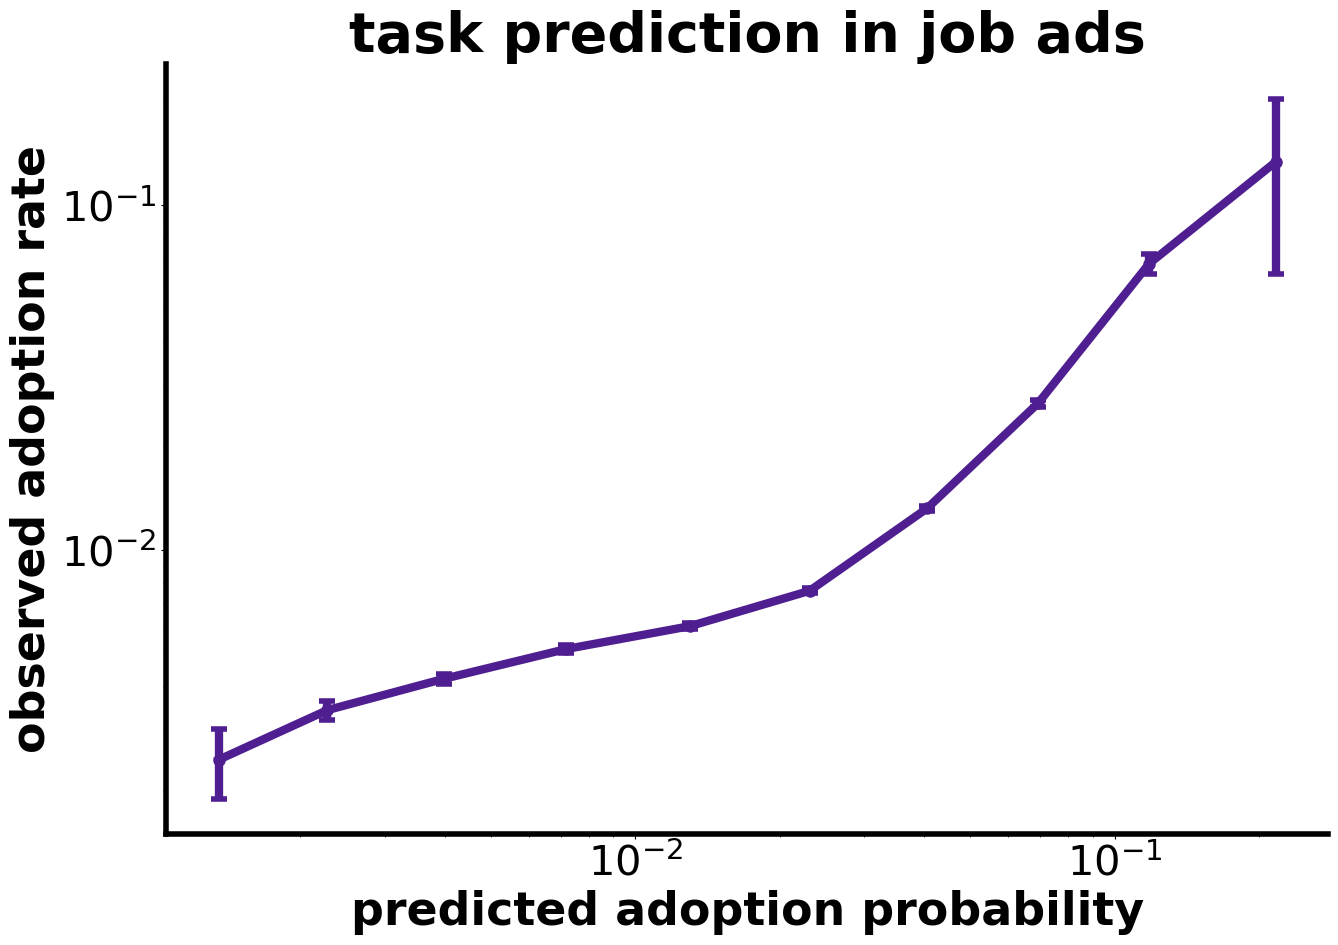

In [1]:
from scipy.stats import binned_statistic
from pickle_file import load_obj, save_obj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = 'data_processing/data_files/task_space_data/'
data_path_save = data_path + 'obj_tag_question_bipartite_core_space/'

data_label = 'HN_data_gpt35'

shanghai_metro_color_23 = ['#EA0437', '#87D300', '#FFD100', '#4F1F91', '#A24CC8', '#FF7200', '#009EDB', '#78C7EB', '#BC87E6', '#7C2230', '#007B63', '#D71671', '#F293D1', '#7F7800', '#BBA786', '#32D4CB', '#B67770', '#D6A461', '#DFC765', '#666666', '#999999', '#009090', '#666666']

level_name = ['1st', '2nd', '3rd']
bin_number = [10,12,12]
fig = plt.figure(figsize=(15,10))


for level in range(1,2):
    
    cp_all = load_obj(f'gptdesp_cp_all_{level}', data_path_save + f'jobs/{data_label}/')
    x_data = [cp[0] for cp in cp_all if cp[0] > 0]
    y_data = [cp[1] for cp in cp_all if cp[0] > 0]
    
    import numpy as np
    data_list = x_data

    if (min(data_list)==0):
        data_log_min = 0
    else:
        data_log_min = np.log10(min(data_list))

    data_log_space = np.logspace(data_log_min, np.log10(max(data_list)), 11, base=10)

    

    bin_centers, _, _ = binned_statistic(x_data, x_data, statistic='mean', bins=data_log_space)
    bin_averages, _, _ = binned_statistic(x_data, y_data, statistic='mean', bins=data_log_space)
    bin_count, _, _ = binned_statistic(x_data, y_data, statistic='count', bins=data_log_space)
    
    error_bar_y = np.sqrt(bin_averages * (1 - bin_averages))/np.sqrt(bin_count) * 1.96
    import matplotlib.pyplot as plt

    plt.errorbar( bin_centers , bin_averages ,yerr=error_bar_y, fmt='-o',ms = 8, lw = 6, capsize = 6, capthick=4,c = shanghai_metro_color_23[3] )
    del cp_all

x_label_name = 'predicted adoption probability'
y_label_name = 'observed adoption rate'

plt.xlabel(x_label_name,fontsize=33, weight = 'bold')
plt.ylabel(y_label_name,fontsize=33, weight = 'bold')
plt.title('task prediction in job ads',fontsize=40,  weight = 'bold')
# ####设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=30)
#plt.legend()
plt.rc('font', weight='bold')
#plt.legend()
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(4);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(4);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细
ax.set_xscale('log')
ax.set_yscale('log')
#plt.xticks(np.arange(0,24,1))
# 设置 X 轴的网格线，风格为 点画线
#plt.grid(axis='x',linestyle='-.')
#plt.xticks([0,0.02,0.04,0.06,0.08],[0,0.02,0.04,0.06,0.08])

font1 = {'family':'sans-serif',
        'weight' : 'normal',
        'size'   : 23,
}
#legend = plt.legend(prop=font1, frameon = False)

#plt.savefig('figures_output/figure_2b_job_advertisement_task_prediction_gptdesp.svg', format = 'svg', transparent = True)
plt.show()

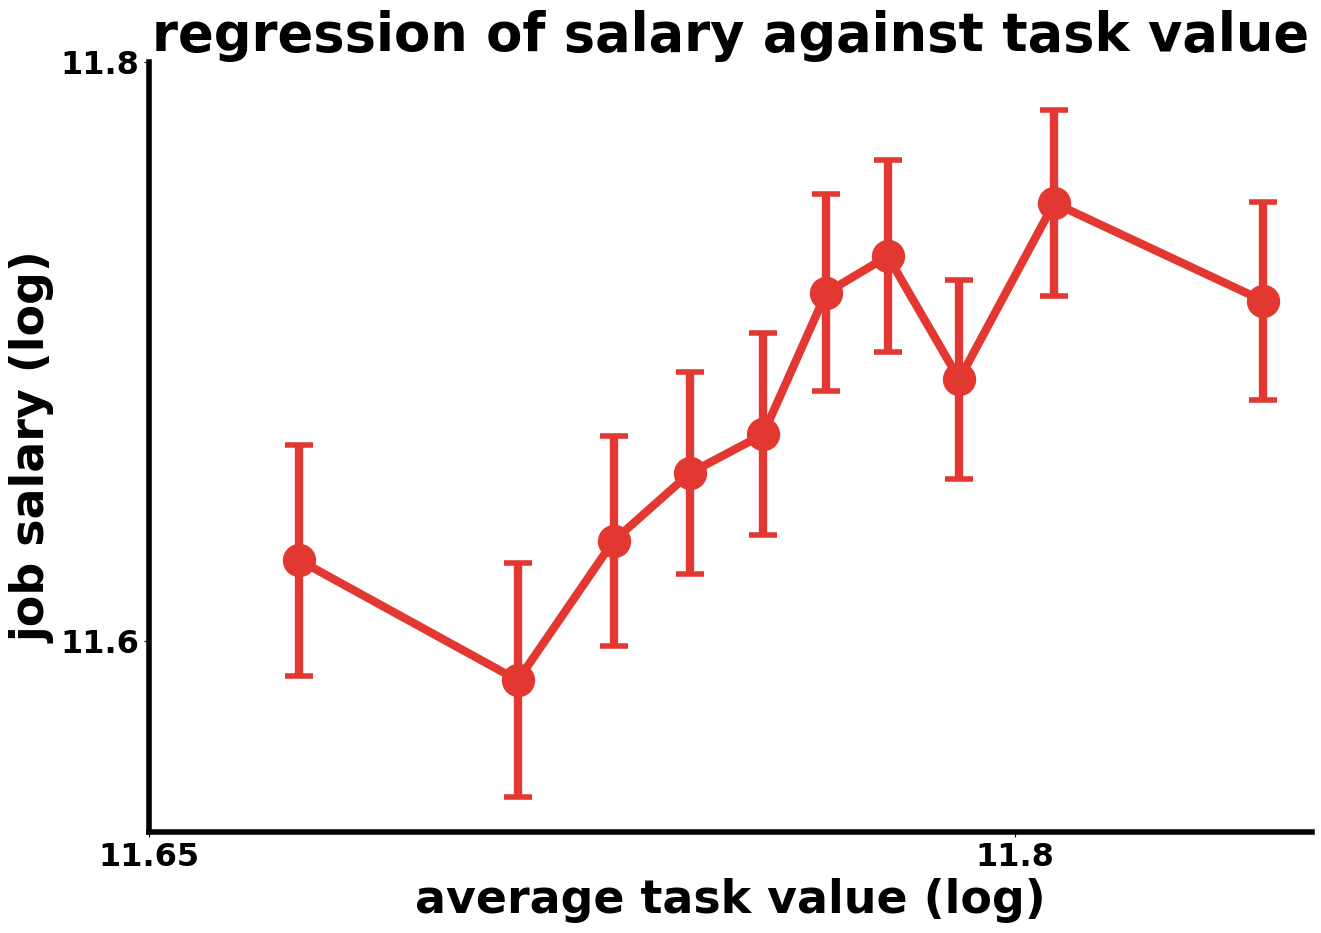

In [2]:
data_label = 'HN_data_gpt35'
density_user_label = 'all_threshold_user'

##! salary year: SO 2018 to 2022, SV: 2019

so_yearlist = [2018, 2019, 2020,2021,2022,2023]


so_yearlist_salary = [2018, 2019, 2020, 2021, 2022, 2023]
sv_yearlist_salary = [2023]
period_label = 'hn_job_task_salary_only_us_log'
topn = 300

salary_type = 'mean'

level = 1

#sample_user_label = 'half_user'
sample_user_label = 'all_threshold_user'
#sample_user_label = 'all_answer_user'

df = pd.read_csv(data_path_save + f'jobs/{data_label}/gptdesp_{period_label}_{so_yearlist_salary}_{sv_yearlist_salary}_df_regression_level_{level}_topn_{topn}_{sample_user_label}.csv')

job_salary_dict = pd.Series(df.salary.values,index=df.index).to_dict()
task_value_dict = pd.Series(df.job_task_salary_average.values,index=df.index).to_dict()


job_salary_list = []
task_value_list = []
for j in job_salary_dict.keys():
    job_salary_list.append(np.log(job_salary_dict[j]))
    task_value_list.append(task_value_dict[j])

from scipy.stats import binned_statistic

x_data = task_value_list
y_data = job_salary_list

n_bins = 10

d = pd.qcut(x_data, n_bins, retbins = True, duplicates='drop')

bin_centers, _, _ = binned_statistic(x_data, x_data, statistic='mean', bins=d[1])
bin_averages, _, _ = binned_statistic(x_data, y_data, statistic='mean', bins=d[1])
bin_std, _, _ = binned_statistic(x_data, y_data, statistic='std', bins=d[1])
bin_count, _, _ = binned_statistic(x_data, y_data, statistic='count', bins=d[1])

bin_er = [s/np.sqrt(c) * 1.96 for s,c in zip(bin_std, bin_count)]

import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

color_yyahn = ['#e33831', '#f7ad30', '#8dc53e', '#cab6d9', '#08b07f', '#f2a794', '#ed643a', '#871918', '#a1d9e8', '#bfbfbf', '#d5c726', '#508dc4', '#2b2062', '#7d7d7d', '#446fb3', '#9fb5de', '#faccbd', '#5f903e', '#1fb24a', '#3599cb', '#1db58f', '#aa792a', '#9ead38']

plt.errorbar(bin_centers , bin_averages ,yerr=bin_er, fmt='o',ms = 23, lw = 6, capsize = 10, c = '#e33831', capthick=4, alpha = 1)
plt.plot(bin_centers, bin_averages,ms = 12, lw = 6, c = '#e33831',alpha = 1)

x_label_name = 'average task value (log)'
y_label_name = 'job salary (log)'

plt.xlabel(x_label_name,fontsize=33, weight = 'bold')
plt.ylabel(y_label_name,fontsize=33, weight = 'bold')
plt.title('regression of salary against task value',fontsize=38, weight = 'bold')
# ####设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=23)
#plt.legend()
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(4);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(4);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细
#ax.set_xscale('log')
#ax.set_yscale('log')
#plt.xlim([11.64,11.85])
#plt.ylim([11.58,11.83])
plt.xticks([11.65,11.8],[11.65,11.8])
plt.yticks([11.6,11.8],[11.6,11.8])
#plt.xticks([],[])
#plt.yticks([],[])

#plt.xticks(np.arange(0,24,1))
# 设置 X 轴的网格线，风格为 点画线
#plt.grid(axis='x',linestyle='-.')

font1 = {'family':'sans-serif',
        'weight' : 'normal',
        'size'   : 23,
}
#legend = plt.legend(prop=font1)

#plt.savefig('figures_output/figure_2c_salary_regression_gptdesp.svg', format = 'svg', transparent = True)
plt.show()
